In [1]:

####################################################################################################
####################################################################################################

import sys
import os

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pprint


from IPython.display import display

sys.path.append(os.path.abspath("../"))
sys.path.append(os.path.abspath("../pax"))

from pax_utils import event_utils
from pax_utils import file_utils
from pax_utils import interaction_utils
from pax_utils import s1s2_utils
from pax_utils import waveform_utils

from pax import core

pp = pprint.PrettyPrinter(depth=6)



In [2]:

####################################################################################################
####################################################################################################

def processPklEvents(zipfilename):

    ################################################################################################
    ################################################################################################
    
    lst_pkl_files  = file_utils.getListOfPklFilesFromZipFile(zipfilename, nEventsPerFile)

    
    ################################################################################################
    ################################################################################################
    
    df_zip_event  = pd.DataFrame()
    df_zip_intr   = pd.DataFrame()
    df_zip_s2s    = pd.DataFrame()
    df_zip_merged = pd.DataFrame()
    
        
    ################################################################################################
    ################################################################################################
    
    for iPklFile in range(0, len(lst_pkl_files)):
    
        ############################################################################################
        ############################################################################################
        
        pklfilename  = lst_pkl_files[iPklFile]
        event        = file_utils.getPaxEventFromPklFileInZipArchive(zipfilename, pklfilename)

        
        ############################################################################################
        ############################################################################################
        
        interactions  = event.interactions
        nInteractions = len(interactions)
        

            
        ############################################################################################
        ############################################################################################

        sum_wf = []
        
        if (nInteractions != 1): continue
           
        if (len(interactions) > 0):
            
            intr = interactions[0]
            
            sum_wf = event.peaks[intr.s2].sum_waveform_top
                
                
        ############################################################################################
        ############################################################################################
        
        df_pkl_event  = event_utils.getEventDataFrameFromEvent(event)
        df_pkl_intr   = interaction_utils.getInteractionDataFrameFromEvent(event)
        df_pkl_s2s    = s1s2_utils.getS2integralsDataFrame(event.event_number, 127)
        
        #display(df_pkl_event)
        display(df_pkl_intr)
        #display(df_pkl_s2s)
        
        
        ############################################################################################
        ############################################################################################
        
        df_test     = waveform_utils.getS2waveformsAllChannels(event)
        sum_wf_test = waveform_utils.getSummedWaveform(df_test)
        
        print("Sum WF Length: " + str(len(sum_wf)))
        print("Sum WF Length Test: " + str(len(sum_wf_test)))
    
        plt.plot(sum_wf)
        plt.plot(sum_wf_test)
        
        
        ############################################################################################
        ############################################################################################
    
        df_zip_event  = df_zip_event.append (df_pkl_event)
        df_zip_intr   = df_zip_intr.append  (df_pkl_intr)
        df_zip_s2s    = df_zip_s2s.append   (df_pkl_s2s)
        
        df_pkl_merged = df_pkl_event.merge(df_pkl_intr).merge(df_pkl_s2s)
        df_zip_merged = df_zip_merged.append(df_pkl_merged)
        
        continue
            
    
    ################################################################################################
    ################################################################################################
    
    df_zip_merged.reset_index(inplace=True, drop=True)
       
    return df_zip_merged

    

,event_number,intr_count,intr_x,intr_y,intr_x_nn,intr_y_nn,intr_xy_posrec_algorithm,intr_s1,intr_s2,intr_corrected_s1_area,intr_corrected_s2_area,intr_s1_photons,intr_s2_electrons
1,1,1,3.117168,-16.583333,3.2708,-16.607226,PosRecTopPatternFit,3,9,19.432068,2102.227029,NaN,98.696105



Unique Channels with Pulses: 182


----- Event:  1 -------------------------

Interactions: 1
Total Pulses: 400

S2 Single Combined Pulses in Time Window (105426 - 105888):


,channel,left,right,raw_data
0,0,105424,105791,"[2, -2, 0, -4, 0, -4, 1, -6, 0, -3, 2, -4, -1,..."
1,9,105400,105501,"[0, -2, -2, -2, -2, 2, 0, 2, -3, 2, -2, 0, -4,..."
2,10,105580,105681,"[-4, 2, -1, 3, -3, -1, -3, 2, -4, -1, -5, 0, -..."
3,15,105526,105685,"[0, -2, 1, -3, 1, -2, 4, 1, -2, -2, 3, 0, 2, -..."
4,16,105486,105789,"[1, -2, 0, -2, 0, 1, 1, -1, 0, 0, 0, 1, 1, 0, ..."



Aligned (105426 - 105888):


,channel,left,right,raw_data
0,0,105380,105971,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
1,9,105380,105971,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
2,10,105380,105971,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
3,15,105380,105971,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
4,16,105380,105971,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."


Sum WF Length: 251
Sum WF Length Test: 592

Done





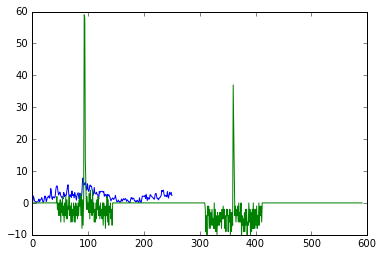

In [3]:

####################################################################################################
####################################################################################################

zipfilename    = '../pax_run/pax_output/instructions_000000/XENON1T-0-000000000-000000999-000001000.zip'
nEventsPerFile = 2

df_zip_merged = processPklEvents(zipfilename)


####################################################################################################
####################################################################################################

print()
print("Done")
print()
#display(df_zip_merged)
print()
#pp.pprint(list(df_zip_merged.columns.values))
print()


In [ ]:

####################################################################################################
####################################################################################################

evt   = core.pax.datastructure.Event(248, 0, sample_duration=10, length=10000)
intrs = evt.interactions

evt.
if (len(intrs) > 0):

    intr  = intrs[0]

